<a href="https://colab.research.google.com/github/justinemajor/progFest/blob/main/networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

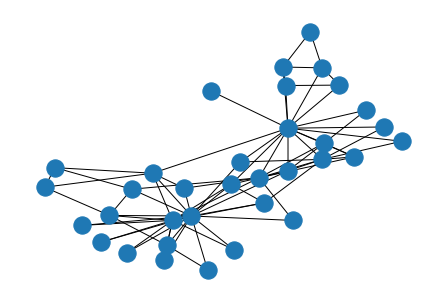

In [3]:
nx.draw_spring(G)

In [4]:
type(G)

networkx.classes.graph.Graph

In [5]:
matrix = nx.to_numpy_array(G)
matrix.shape

(34, 34)

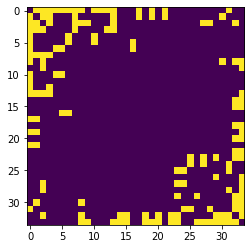

In [6]:
plt.imshow(matrix)

In [7]:
np.sum(matrix, axis=1)

array([16.,  9., 10.,  6.,  3.,  4.,  4.,  4.,  5.,  2.,  3.,  1.,  2.,
        5.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  5.,  3.,  3.,
        2.,  4.,  3.,  4.,  4.,  6., 12., 17.])

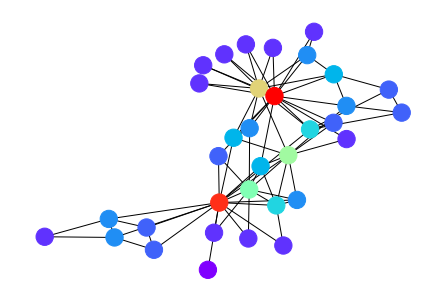

In [9]:
nx.draw_spring(G, node_color=np.sum(matrix, axis=1), cmap="rainbow") # or cmap="flag"

In [36]:
class Epidemic:
    
    def __init__(self, N, I_0=1, p_infection=0.1, p_recovery=0.01):
        self.N = N
        self.I_0 = I_0
        self.p_recovery = p_recovery
        self.p_infection = p_infection
        self.status = np.expand_dims(np.array([0] * N), axis=1)
        self.status[:I_0, 0] = 1
        np.random.shuffle(self.status)
        self.A = np.zeros((N, N)) 
        
    def initiateContacts(self, adjacencyMatrix):
        self.A = adjacencyMatrix
    
    def simulate(self, duration):
        T = int(duration)
        status = np.zeros((self.N, T)).astype('int')
        status[:, 0] = self.status[:, -1]
        for i in range(1, T):
            infectedPeople = status[:, i - 1] == 1
            status[infectedPeople, i] = 1
            infectedContacts = self.p_infection * (self.A @ status[:, i-1])
            immuneResponse = np.random.uniform(0, 1, self.N)
            infections = infectedContacts > immuneResponse
            status[infections, i] = 1
            condition1 = np.random.uniform(0, 1, self.N) > (1 - self.p_recovery)
            condition2 = (status[:, i - 1] == 1)
            recoveries = condition1 & condition2
            status[recoveries, i] = 0
            """dé = np.random.uniform(0,1)
            if dé > 0.99:
              for ii in range(self.N):
                for iii in range(self.N):
                  value = self.A[ii, iii]
                  if value != 0:
                    self.A[ii, iii] = 0
                    break
                break"""  # Pour simuler isolement...
        self.status = np.append(self.status, status[:, 1:], axis=1)

In [37]:
def WSNetwork(N, k, p):
    G = nx.watts_strogatz_graph(N, k, p)
    matrix = nx.to_numpy_array(G)
    return matrix

In [38]:
epidemic = Epidemic(34, I_0=1, p_infection=0.2, p_recovery=0.1)
epidemic.initiateContacts(matrix)
epidemic.simulate(5000)

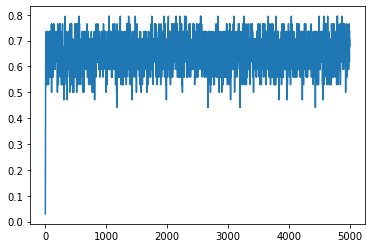

In [39]:
plt.plot(np.mean(epidemic.status, axis=0))